# Classificação de Autismo: Análise de Distâncias Faciais

Este notebook tem como objetivo classificar o autismo com base em medições de distâncias faciais. Usaremos conjuntos de dados contendo distâncias calculadas a partir de marcos faciais para indivíduos com e sem autismo. A classificação será realizada utilizando os algoritmos K-Nearest Neighbors (KNN) e Random Forest.

## Tabela de Conteúdos

1. [Importação de Bibliotecas](#importação-de-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Pré-processamento de Dados](#pré-processamento-de-dados)
4. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
5. [Treinamento e Avaliação do Modelo](#treinamento-e-avaliação-do-modelo)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Classificador Random Forest](#classificador-random-forest)


### Importando bibliotecas


In [16]:
#importação-de-bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


### Carregamento de dados

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.


In [64]:
# Carregar os conjuntos de dados
df_no_autism = pd.read_csv("../../data/preprocessed_landmark/distances_no_autism.csv")
df_with_autism = pd.read_csv("../../data/preprocessed_landmark/distances_with_autism.csv")

# Combinar os conjuntos de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)


### Pré-processamento de Dados

Padronizar as características relevantes para melhorar o desempenho dos modelos de aprendizado de máquina.


In [3]:
# Pré-processar os dados
standardScaler = StandardScaler()

# Selecionar colunas a serem padronizadas (atualize com base nas suas colunas de distância)
columns_to_scale = ['middle_facial_height', 'lower_facial_height', 
                    'philtrum', 'intercanthal_width', 'biocular_width', 'nasal_width', 'mouth_width']

data_total[columns_to_scale] = standardScaler.fit_transform(data_total[columns_to_scale])


### Análise Exploratória de Dados

Análise exploratória inicial para entender melhor o conjunto de dados.


      samples  class  middle_facial_height  lower_facial_height   philtrum  \
0         2.0    0.0             68.860080            64.215279  11.517276   
1         3.0    0.0             59.252244            59.872557  11.582057   
2         5.0    0.0             62.921942            64.045623  16.938434   
3         6.0    0.0             71.221977            88.406517  16.209815   
4         7.0    0.0             70.226914            72.062740  15.425547   
...       ...    ...                   ...                  ...        ...   
2290   1462.0    1.0             58.200104            87.988474   8.866916   
2291   1463.0    1.0             62.557028            69.727392   6.829671   
2292   1465.0    1.0             66.044913            74.129316  16.209898   
2293   1466.0    1.0             61.645033            67.164645  11.523762   
2294   1468.0    1.0             64.065013            53.217367  10.529829   

      intercanthal_width  biocular_width  nasal_width  mouth_wi

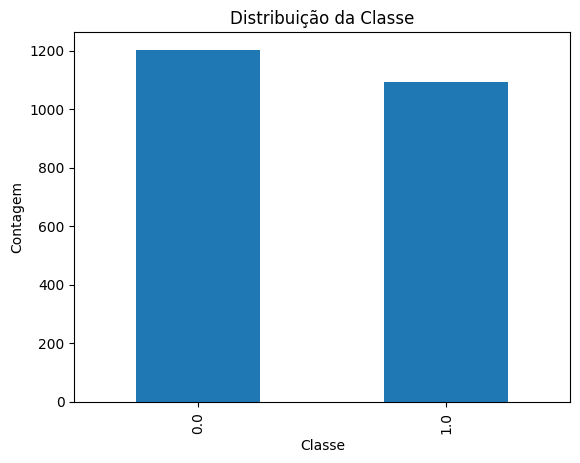

In [65]:
# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Removendo linhas onde qualquer uma das colunas especificadas contém dados nulos
data_total_cleaned = data_total.dropna(subset=columns_to_scale)
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Para verificar o resultado
print(data_total_cleaned)

### Treinamento e Avaliação do Modelo

#### K-Nearest Neighbors (KNN)

Treinar um classificador KNN e avaliar seu desempenho usando validação cruzada.


      middle_facial_height  lower_facial_height   philtrum  \
0                68.860080            64.215279  11.517276   
1                59.252244            59.872557  11.582057   
2                62.921942            64.045623  16.938434   
3                71.221977            88.406517  16.209815   
4                70.226914            72.062740  15.425547   
...                    ...                  ...        ...   
2290             58.200104            87.988474   8.866916   
2291             62.557028            69.727392   6.829671   
2292             66.044913            74.129316  16.209898   
2293             61.645033            67.164645  11.523762   
2294             64.065013            53.217367  10.529829   

      intercanthal_width  biocular_width  nasal_width  mouth_width  
0              55.286244      130.963019    44.366332    91.299925  
1              48.986551      120.427291    38.561207    84.758111  
2              51.150772      118.002091    38.8

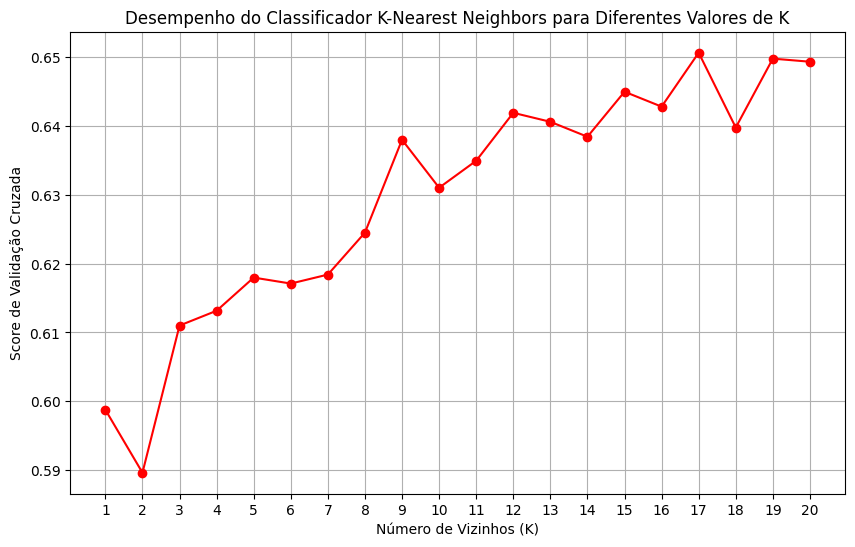

In [66]:
# Dividir os dados em características e variável alvo
y = data_total_cleaned['class']
 # Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

print(X)
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()


#### Classificador Random Forest

Treinar um classificador Random Forest e avaliar seu desempenho.


In [67]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.6541370799316499


#### Classificador CNN

Treinar um classificador Rede Neural Convolucional e avaliar seu desempenho.


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Supondo que data_total_cleaned seja o seu DataFrame já processado
# Converta a coluna 'class' para int e depois para one-hot encoding
y = data_total_cleaned['class'].astype(int)
y = to_categorical(y)

# Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

# Certifique-se de que X é um array NumPy com dtype float32
X = X.values.astype('float32')

# Verifique o formato de X e y
print(f'Shape de X: {X.shape}')
print(f'Shape de y após codificação: {y.shape}')

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifique os shapes de X_train e y_train
print(f'Shape de X_train: {X_train.shape}')
print(f'Shape de y_train: {y_train.shape}')

# Construir o modelo MLP (Fully Connected Neural Network)
model = Sequential()

# Adicionar a camada de entrada
model.add(Input(shape=(X_train.shape[1],)))  # Número de features como input_shape

# Adicionar camadas densas
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Camada de saída (softmax para classificação multiclasse)
model.add(Dense(2, activation='softmax'))  # 2 classes no seu caso

# Compilar o modelo
# Para classificação binária, você pode usar binary_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Shape de X: (2295, 7)
Shape de y após codificação: (2295, 2)
Shape de X_train: (1836, 7)
Shape de y_train: (1836, 2)


ValueError: object __array__ method not producing an array

In [68]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Caminhos para os datasets
train_dir = '../../../train/'  # Substitua com o caminho das imagens de treino
test_dir = '../..//../test/'    # Substitua com o caminho das imagens de teste

# Gerador de dados para carregar as imagens e aplicar data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Redimensiona para 128x128 pixels
    batch_size=32,
    class_mode='binary')     # Assumindo que seja uma classificação binária (autístico vs não-autístico)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

# Construção do modelo CNN
model = Sequential()

# Adicionando camadas convolucionais e de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Camada inicial
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten para converter a matriz em um vetor
model.add(Flatten())

# Camadas densas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularização para evitar overfitting

# Camada de saída (1 neurônio para saída binária)
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' para mais de duas classes

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(
    train_generator,
    epochs=20,  # Ajuste conforme necessário
    validation_data=validation_generator)

# Avaliação do modelo
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Relatório de classificação e matriz de confusão
Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).astype(int)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Non-Autistic', 'Autistic']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '../../train/'